Importing required classes

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [ ]:

train = pd.read_csv('gdrive/MyDrive/train.csv')
test = pd.read_csv('gdrive/MyDrive/test.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
print(train)

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
41995      0       0       0       0  ...         0         0         0         0
41996      1       0       0       0  ...         0         0         0         0
41997      7       0       0       0  ...         0         0         0         0
41998      6       0       0       0  ...         0         0         0         0
41999      9       0       0       0  ...         0         0         0         0

[42000 rows x 7

We will have to create 2D arrays to input in our CNN from the data given in one line, for this we ust the reshape function available in numpy

In [ ]:
train_x=np.zeros((42000,28,28))
for i in range(42000):
  arr=np.reshape(np.array(train.iloc[i,1:]),(28,28))
  train_x[i]=arr
print(train_x.shape)

(42000, 28, 28)


Now we use tensorflow to create our CNN model (tensorflow makes it really easy)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

Our model requires inputs of shape (28,28,1) so we have to use np.newaxis to add another dimension to train_x

In [ ]:
train_x=train_x[:,:,:,np.newaxis]
print(train_x.shape)

(42000, 28, 28, 1)


In [ ]:
train_y1=np.array(train.label)
print(train_y1.shape)
print(train)

(42000,)
       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
41995      0       0       0       0  ...         0         0         0         0
41996      1       0       0       0  ...         0         0         0         0
41997      7       0       0       0  ...         0         0         0         0
41998      6       0       0       0  ...         0         0         0         0
41999      9       0       0       0  ...         0         0         0         0

[42000

Now finally we can compile and fit our model with the train data 

In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_x, train_y1, epochs=10)
                    

Epoch 1/10
1313/1313 [==============================] - 39s 29ms/step - loss: 0.8519 - accuracy: 0.8671
Epoch 2/10
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0736 - accuracy: 0.9775
Epoch 3/10
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0551 - accuracy: 0.9822
Epoch 4/10
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0443 - accuracy: 0.9863
Epoch 5/10
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0364 - accuracy: 0.9889
Epoch 6/10
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0362 - accuracy: 0.9884
Epoch 7/10
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0301 - accuracy: 0.9904
Epoch 8/10
1313/1313 [==============================] - 39s 29ms/step - loss: 0.0214 - accuracy: 0.9939
Epoch 9/10
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0225 - accuracy: 0.9929
Epoch 10/10
1313/1313 [==============================] - 40s 30m

Now our weights are good we can predict outputs for test cases

In [ ]:
print(test)

       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
27995       0       0       0       0  ...         0         0         0         0
27996       0       0       0       0  ...         0         0         0         0
27997       0       0       0       0  ...         0         0         0         0
27998       0       0       0       0  ...         0         0         0         0
27999       0       0       0       0  ...         0         0         0         0

[28

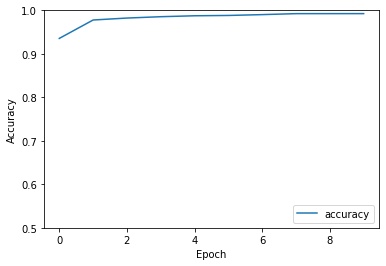

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [ ]:
test_x=np.zeros((28000,28,28))
for i in range(28000):
  arr=np.reshape(np.array(test.iloc[i,0:]),(28,28))
  test_x[i]=arr
print(test_x.shape)
test_x=test_x[:,:,:,np.newaxis]
print(test_x.shape)

(28000, 28, 28)
(28000, 28, 28, 1)


In [ ]:
predictions = model(test_x, training=False)


In [ ]:
print(predictions)

tf.Tensor(
[[ -0.8943529   7.5691757  28.741083  ...   5.6420836 -11.9938
   -4.0548553]
 [ 27.689142   -7.888076    4.5192833 ...   5.2807107   2.6563158
    5.0929728]
 [-10.394838   -3.7910948  -1.6679579 ...   5.2930346   8.137947
   18.404415 ]
 ...
 [  2.5925791   7.2304797  11.641364  ...  17.57304     7.8079205
   15.222433 ]
 [ -2.045692   -3.157062   -4.825024  ...   6.2846494   6.0758357
   20.24177  ]
 [ -8.159147    1.495016   26.98941   ...   1.951115   -9.92803
   -7.602628 ]], shape=(28000, 10), dtype=float32)


In [ ]:
class_idx=np.zeros((28000))
arr=np.zeros(28000)
for i, logits in enumerate(predictions):
  class_idx[i] = tf.argmax(logits).numpy()
  arr[i]=int(i+1)
print(class_idx)  
print(arr)

[2. 0. 9. ... 3. 9. 2.]
[1.0000e+00 2.0000e+00 3.0000e+00 ... 2.7998e+04 2.7999e+04 2.8000e+04]


Finally we store results in dataframe and convert it to csv format

In [ ]:
df=pd.DataFrame(data=arr,columns=['ImageId'])
print(df)


       ImageId
0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
...        ...
27995  27996.0
27996  27997.0
27997  27998.0
27998  27999.0
27999  28000.0

[28000 rows x 1 columns]


In [ ]:
df['Label']=class_idx
print(df)

       ImageId  Label
0          1.0    2.0
1          2.0    0.0
2          3.0    9.0
3          4.0    0.0
4          5.0    3.0
...        ...    ...
27995  27996.0    9.0
27996  27997.0    7.0
27997  27998.0    3.0
27998  27999.0    9.0
27999  28000.0    2.0

[28000 rows x 2 columns]


In [ ]:
df=df.astype(int)

In [ ]:
df.to_csv("submission.csv",index=False)